In [5]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [6]:
%%capture               
%run CO2_vs_GDP.ipynb
%run CO2_vs_Temp.ipynb
%run CO2_vs_PH.ipynb
%run Temp_vs_Sea.ipynb



In [7]:
class Predictions():
    # attributes are data frames

    def __init__(self, co2):
        self.co2 = co2
        co2 = co2.copy(deep=True)
        self.gdp = co2_to_gdp(co2)
        self.ph = co2_to_ph(co2)
        self.temp = co2_to_temp(co2)
        self.sea = temp_to_sea(self.temp)

    def plot(self):
        gdp = pd.read_csv(r"../data/GDP.csv")
        ph = pd.read_csv(r"../data/PH.csv")
        temp = pd.read_csv(r"../data/Temp.csv")
        sea = pd.read_csv(r"../data/Sea.csv")

        plt.plot(np.asarray(gdp["Year"], float), gdp["GDP"], color="Green", label="ground truth")
        plt.plot(np.asarray(self.gdp["Year"], float), self.gdp["GDP"])
        plt.xlabel("Year")
        plt.ylabel("International Dollars / Capita")
        plt.title("GDP")
        plt.legend()
        plt.show()

        plt.plot(np.asarray(ph["Year"], float), ph["PH"], color="Green", label="ground truth")
        plt.plot(np.asarray(self.ph["Year"], float), self.ph["PH"])
        plt.xlabel("Year")
        plt.ylabel("")
        plt.title("Ocean PH")
        plt.legend()
        plt.show()

        plt.plot(np.asarray(temp["Year"], float), temp["Temp"], color="Green", label="ground truth")
        plt.plot(np.asarray(self.temp["Year"], float), self.temp["Temp"])
        plt.xlabel("Year")
        plt.ylabel("°C")
        plt.title("Surface Temperature Anomaly")
        plt.legend()
        plt.show()

        plt.plot(np.asarray(sea["Year"], float), sea["Sea"], color="Green", label="ground truth")
        plt.plot(np.asarray(self.sea["Year"], float), self.sea["Sea"])
        plt.xlabel("Year")
        plt.ylabel("mm")
        plt.title("Sea Level Rise")
        plt.legend()
        plt.show()

    def save(self, path = None, suffix = ""):
        if path is None:
            return
        
        self.co2.to_csv(f"{path}CO2{suffix}.csv", index=False)
        self.gdp.to_csv(f"{path}GDP{suffix}.csv", index=False)
        self.ph.to_csv(f"{path}PH{suffix}.csv", index=False)
        self.temp.to_csv(f"{path}Temp{suffix}.csv", index=False)
        self.sea.to_csv(f"{path}Sea{suffix}.csv", index=False)


/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_61265/1597686766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp + 0.5"] = temp["Temp"] + 0.5
/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_61265/1597686766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp cum"] = temp["Temp + 0.5"].cumsum()


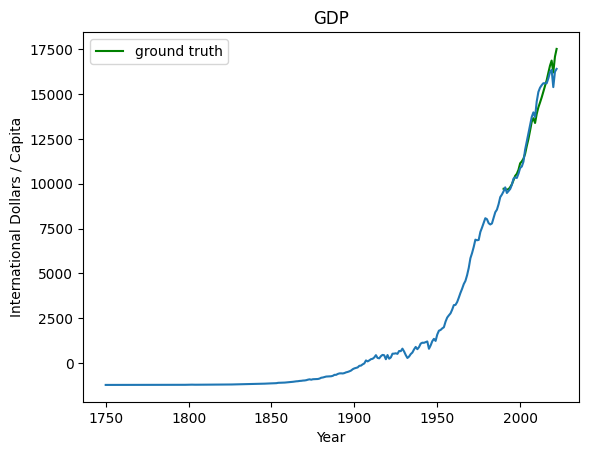

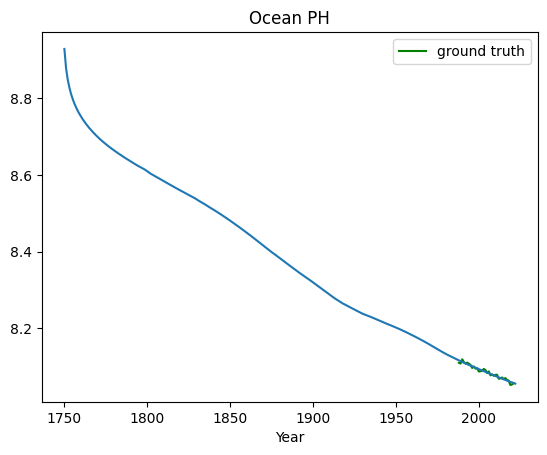

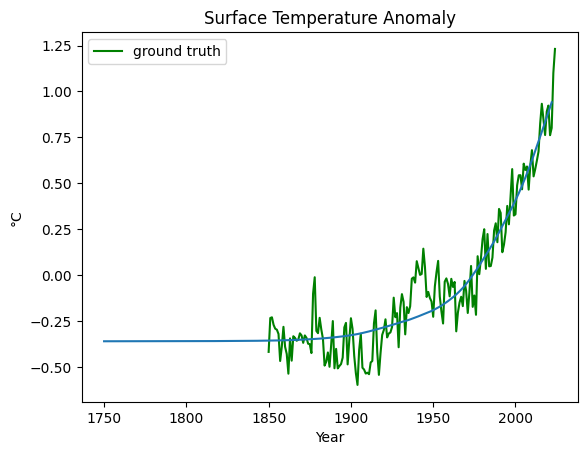

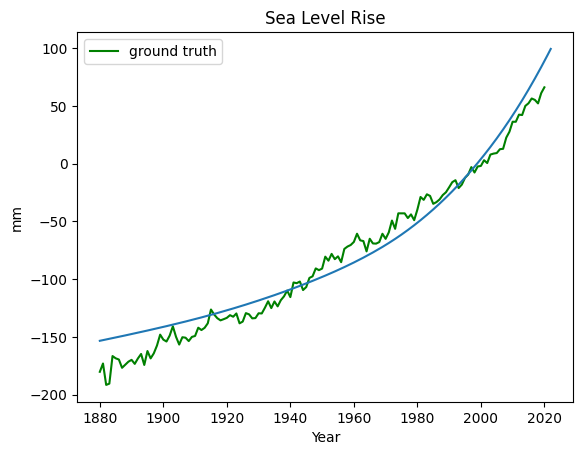

In [8]:
co2 = pd.read_csv(r"../data/CO2.csv")
predictions = Predictions(co2)
predictions.plot()
